<a href="https://colab.research.google.com/github/ajtamayoh/Spoon-Knife/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regresi**ón (métodos numéricos)

Regresión por mínimos cuadrados

Regresión lineal

Ajustar una línea recta a un conjunto de puntos $(x_1,y_1), (x_2,y_2),...,(x_n,y_n)$

Modelo:

$ y = a_0+a_1x+e $

Donde $e$ es el error o diferencia entre el modelo y las observaciones:

$ e = y-a_0+a_1x $

Así el error o residuo es la diferencia entre el valor verdadero y el valor aproximado por el modelo.

# Criterio para un mejor ajuste

Una estrategia para ajustar una mejor línea a través de los datos será minimizar la suma de los errores residuales de todos los datos disponibles, como sigue:

$ S_r = \sum_{i=1}^{n}e_i^2 = \sum_{i=1}^{n}(y_{i-teorica}-y_{i-predicha})^2 =\sum_{i=1}^{n}(y_i-a_0-a_1x_i)^2 $

Este criterio tiene varias ventajas, entre ellas que permite obtener una única línea recta para un conjunto de puntos dado.

# Ajuste de una línea recta por mínimos cuadrados

Como se requiere minimizar $S_r$, se debe derivar con respecto a $a_0 y a_1$ e igualar a cero.

Resolviendo de manera simultánea el sistema de dos ecuaciones con dos incógnitas que surge del paso anterior, se llega a qué:

$ a_1 = \frac{n\sum x_iy_i-\sum x_i\sum y_i}{n\sum x_i^2-(\sum x_i)^2} $

$a_0=\bar{y}-a_1\bar{x}$

Donde $\bar{y}$ y $\bar{x}$ son las medias de $y$ y $x$ respectivamente.

# Ejemplo

Encuentre la recta que mejor se ajuste a los datos de la siguiente tabla.

<table>
  <tr>
   <td>xi</td><td>yi</td> 
     <tr>
   <td>1</td><td>0.5</td> 
   <tr>
   <td>2</td><td>2.5</td> 
   <tr>
   <td>3</td><td>2.0</td> 
   <tr>
   <td>4</td><td>4.0</td> 
   <tr>
   <td>5</td><td>3.5</td> 
   <tr>
   <td>6</td><td>6.0</td> 
   <tr>
   <td>7</td><td>5.5</td> 
   
     Debemos encontrar los valores de $a_0$ y $a_1$, graficar los puntos y la recta de ajuste.
     

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def minimos_cuadrados(listaX, listaY):
  
  n = len(listaX)
  
  x_por_y = 0
  x_cuadrado = 0
  xs = 0
  ys = 0
  x_media = np.mean(listaX)
  y_media = np.mean(listaY)
  
  St = 0
  
  for x, y in zip(listaX, listaY):
    
    x_por_y += x*y
    x_cuadrado += x**2
    xs += x
    ys += y  
    St += (y-y_media)**2
  
  #print(n,x_por_y,x_cuadrado,xs,ys,x_media,y_media)
  
  
  a1 = ((n*x_por_y)-(xs*ys))/((n*x_cuadrado)-(xs**2))
  a0 = y_media - (a1*x_media)
  
  Sr = 0
  for x,y in zip(listaX,listaY):
    Sr += (y-(a0+(a1*x)))**2
  
  #print(St, Sr)
  
  coefDet = (St-Sr)/St
  coefCorr = np.sqrt(coefDet)
  
  return a0, a1, coefDet, coefCorr

La recta estimada es: y =  0.2678571428571428  +  0.7738095238095238 x


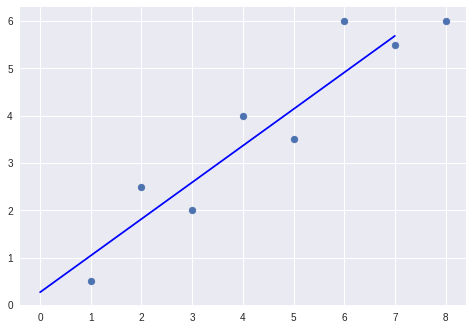

Coeficiente de determinación:  0.8824143692564745
Coeficiente de correlación de Pearson:  0.93936913365113


In [0]:
#Ingrese la lista de puntos
'''
n= int(input('Ingrese la cantidad de puntos con que va a trabajar'))
X = []
Y = []
for i in range(n):
  x = input('Ingrese el valor de x')
  y = input('Ingrese el valor de y')
  X.append(x)
  Y.append(y)

'''

X = [1,2,3,4,5,6,7,8]
Y = [0.5,2.5,2,4,3.5,6,5.5,6]
X = np.asarray(X)
Y = np.asarray(Y)

a0, a1, coefDeter, coefCorre = minimos_cuadrados(X,Y)
print('La recta estimada es: y = ', a0, ' + ', a1, 'x')

puntos = np.linspace(0,7,10)
f = a0 + a1*puntos

plt.scatter(X,Y)
plt.plot(puntos, f, 'b')
plt.show()

#El coeficiente de determinación toma valores entre 0 y 1, siendo 1 el mejor indicativo de ajuste
print('Coeficiente de determinación: ', coefDeter)
#El coeficiente de  correlación lineal de Pearson toma valores entre -1 y 1
print('Coeficiente de correlación de Pearson: ', coefCorre)

La regresión lineal por mínimos cuadrados ordinarios es una excelente herramienta, pero tiene la limitación de estimar una función lineal y no siempre es este el comportamiento de los datos.

# ¿Qué tan bueno es el ajuste logrado?

## Coeficiente de determinación y coeficiente de correlación



# Regresión Polinomial



El procedimiento de mínimos cuadrados se puede extender facilmente al ajuste de datos con un polinomio de grado superior. Por ejemplo, para un polinomio de segundo grado:

$y = a_0+a_1x+a_2x2+e$

De aquí que:

$S_r = \sum_{i=1}^n(y_i-a_0-a_1x_i-a_2x_i^2)^2$

Para minimizar este error, se debe derivar con respecto a $a_0, a_1 y a_2$ y luego igualar a  cero. De allí surge un sistema de 3 ecuaciones y 3 incógnitas.

Desarrollado en clase.

# Ejercicio

Con el siguiente conjunto de puntos ajustar un polinomio de segundo grado usando regresión polinomial. Graficar los puntos, graficar la curva de ajuste y calcular el coeficiente de determinación y el coeficiente de regresión e interpretarlos.

In [0]:
#Datos
X = [0,1,2,3,4,5]
Y = [2.1,7.7,13.6,27.2,40.9,61.1]

In [0]:
#Para resolver sistemas de ecuaciones lineales con numpy
from numpy.linalg import solve

Matriz = np.array([[6,15,55],[15,55,225],[55,225,979]])
Depen = np.array([152.6,585.6,2488.8])

coef = solve(Matriz,Depen)
print(coef)


[2.47857143 2.35928571 1.86071429]


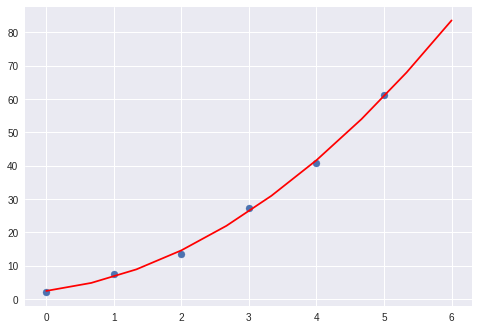

El ajuste del modelo es:  0.998509355889854


In [0]:
#Datos
X = [0,1,2,3,4,5]
Y = [2.1,7.7,13.6,27.2,40.9,61.1]

pts = np.linspace(0,6,10)
f2 = coef[0] + coef[1]*pts + coef[2]*(pts**2)


plt.scatter(X,Y)
plt.plot(pts,f2,'r')
plt.show()

Sr = 3.74657
St = 2513.39

R2 = (St-Sr)/St
print('El ajuste del modelo es: ', R2)

# Referencia

Métodos numéricos para ingenieros. Steven C. Chapra, Raymond P. Canale. McGraw Hill. Quinta Edición.